## LSTM for predicting the class labels in image dataset for Self driving cars

### Group Members
1. Shubham Deshmukh
2. Anirudha Thorat
3. Priyanshu Tripathi
4. Gaurav Gupta

Labels:
{0: 'backgroud',
 1: 'car',
 2: 'truck',
 3: 'pedestrian',
 4: 'bicyclist',
 5: 'light'}

### Dataset prepation for tensorflow lstm Model

In [53]:
import cv2

In [54]:
import pandas as pd
data = pd.read_csv('labels_train.csv')

In [55]:
data.head()
data = data

In [56]:
data.shape

(132406, 6)

In [57]:
data = data.sample(5000)

In [58]:
data.head()

,frame,xmin,xmax,ymin,ymax,class_id
102478,1479503404305524987.jpg,97,123,142,166,1
57193,1478898362874022094.jpg,226,237,149,169,3
14592,1478731947042286948.jpg,171,187,138,150,1
16539,1478732085250968796.jpg,315,336,140,150,1
104102,1479503786330777470.jpg,159,172,131,140,1


In [59]:
data.shape

(5000, 6)

In [60]:
import matplotlib.pyplot as plt
import numpy as np

In [61]:
df = pd.DataFrame(columns = ['filename', 'label'])

In [62]:
df

,filename,label


In [63]:
import os
for i in range(5000):
    temp = data.iloc[i]['frame']
    path = "images/"+temp 
    img = cv2.imread(path,0)
    xmin = data.iloc[i]['xmin']
    xmax = data.iloc[i]['xmax']
    ymin = data.iloc[i]['ymin']
    ymax = data.iloc[i]['ymax']
    croped_img = img[ymin:ymax, xmin:xmax]
    croped_img =cv2.resize(croped_img,(480,480))
    filename = 'image' + str(i) + '.jpg'
    label = data.iloc[i]['class_id']
    path2 = 'C:/Users/Shubham/Desktop/yolo/lstm_data'
    cv2.imwrite(os.path.join(path2 , filename), croped_img)
    new_row = {'filename':filename, 'label':label}
    df = df.append(new_row,ignore_index=True)

    
    
    
    

C:\Users\Shubham\AppData\Local\Temp\ipykernel_18224\1870909941.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row,ignore_index=True)
C:\Users\Shubham\AppData\Local\Temp\ipykernel_18224\1870909941.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row,ignore_index=True)
C:\Users\Shubham\AppData\Local\Temp\ipykernel_18224\1870909941.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row,ignore_index=True)
C:\Users\Shubham\AppData\Local\Temp\ipykernel_18224\1870909941.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(new_row,ignore_index=True)
C:\Users\Shu

In [64]:
df.head()

,filename,label
0,image0.jpg,1
1,image1.jpg,3
2,image2.jpg,1
3,image3.jpg,1
4,image4.jpg,1


In [65]:
df.to_csv('lstm_data/lstm_labels.csv',index=False)

In [1]:
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
directory = 'lstm_data/'
df1 = pd.read_csv(directory + 'lstm_labels.csv')

<IPython.core.display.Javascript object>

In [3]:
df1

,filename,label
0,image0.jpg,1
1,image1.jpg,3
2,image2.jpg,1
3,image3.jpg,1
4,image4.jpg,1
...,...,...
4995,image4995.jpg,1
4996,image4996.jpg,1
4997,image4997.jpg,1
4998,image4998.jpg,5


In [4]:
file_paths = df1['filename'].values
labels = df1['label'].values

In [5]:
dataset = tf.data.Dataset.from_tensor_slices((file_paths,labels))

In [6]:

def _parse_function(filename, label1):
    image_string = tf.io.read_file(directory + filename)
    image_decoded = tf.image.decode_jpeg(image_string, channels=1)
    image = tf.cast(image_decoded, tf.float32)
    return image, label1

In [7]:
dataset = dataset.map(_parse_function)
dataset = dataset.batch(2)

In [8]:
#iterator = dataset.make_one_shot_iterator()
iterator = tf.compat.v1.data.make_one_shot_iterator(dataset)
images, labels1 = iterator.get_next()

## Model training

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
model = Sequential()
model.add(LSTM(100, input_shape = (480,480)))
model.add(Dense(5, activation = 'softmax'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               232400    
                                                                 
 dense (Dense)               (None, 5)                 505       
                                                                 
Total params: 232,905
Trainable params: 232,905
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(optimizer = keras.optimizers.Adam(), loss=[tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)], metrics = ["accuracy"])

In [13]:
model.fit(images, labels1, epochs = 50, verbose = 2)

Epoch 1/50
1/1 - 6s - loss: 1.4862 - accuracy: 0.5000 - 6s/epoch - 6s/step
Epoch 2/50
1/1 - 0s - loss: 1.0008 - accuracy: 1.0000 - 487ms/epoch - 487ms/step
Epoch 3/50
1/1 - 0s - loss: 0.9245 - accuracy: 1.0000 - 489ms/epoch - 489ms/step
Epoch 4/50
1/1 - 0s - loss: 0.9683 - accuracy: 1.0000 - 497ms/epoch - 497ms/step
Epoch 5/50
1/1 - 0s - loss: 0.8375 - accuracy: 1.0000 - 471ms/epoch - 471ms/step
Epoch 6/50
1/1 - 0s - loss: 0.7844 - accuracy: 1.0000 - 484ms/epoch - 484ms/step
Epoch 7/50
1/1 - 0s - loss: 0.7729 - accuracy: 1.0000 - 489ms/epoch - 489ms/step
Epoch 8/50
1/1 - 0s - loss: 0.7407 - accuracy: 1.0000 - 480ms/epoch - 480ms/step
Epoch 9/50
1/1 - 0s - loss: 0.6982 - accuracy: 1.0000 - 348ms/epoch - 348ms/step
Epoch 10/50
1/1 - 0s - loss: 0.6627 - accuracy: 1.0000 - 318ms/epoch - 318ms/step
Epoch 11/50
1/1 - 0s - loss: 0.6465 - accuracy: 1.0000 - 330ms/epoch - 330ms/step
Epoch 12/50
1/1 - 0s - loss: 0.6308 - accuracy: 1.0000 - 337ms/epoch - 337ms/step
Epoch 13/50
1/1 - 0s - loss: 0.

In [ ]:
img1 = cv2.imread('1478020631205595580.jpg',0)

In [ ]:
img1.shape
img1  = cv2.resize(img1, (480,480))

<IPython.core.display.Javascript object>

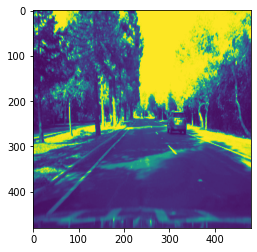

In [16]:
plt.imshow(img1)

In [ ]:
img1 = np.expand_dims(img1,0)

In [19]:
pre_img = model.predict(img1)
max_conf = np.argmax(pre_img[0])
print("conf",max_conf)

1/1 [==============================] - 1s 521ms/step


<IPython.core.display.Javascript object>

conf 1


In [20]:
pre_img

array([[0.0246901 , 0.7650333 , 0.02949398, 0.15528987, 0.02549267]],
      dtype=float32)

### save the model

In [32]:
import pickle
pickle.dump(model, open('model_lstm.pkl','wb'))

INFO:tensorflow:Assets written to: ram://3607531b-c431-4ed4-828e-a19b7613179b/assets


INFO:tensorflow:Assets written to: ram://3607531b-c431-4ed4-828e-a19b7613179b/assets


### Testing data Preparation and Testing the Model on testing data

In [21]:
import pandas as pd
data1 = pd.read_csv('labels_train.csv')

In [23]:
data1 = data1.sample(500)

In [24]:
data1.head()

,frame,xmin,xmax,ymin,ymax,class_id
3404,1478020402203418319.jpg,318,331,142,168,3
86962,1479502053714495558.jpg,382,479,113,203,1
88157,1479502165722105476.jpg,109,132,142,149,1
20955,1478732323247595657.jpg,24,48,132,150,1
47054,1478897632765473223.jpg,303,341,141,156,1


In [25]:
df2 = pd.DataFrame(columns = ['filename', 'label'])

In [ ]:
import os
for i in range(500):
    temp = data1.iloc[i]['frame']
    path = "images/"+temp 
    img = cv2.imread(path,0)
    xmin = data1.iloc[i]['xmin']
    xmax = data1.iloc[i]['xmax']
    ymin = data1.iloc[i]['ymin']
    ymax = data1.iloc[i]['ymax']
    croped_img = img[ymin:ymax, xmin:xmax]
    croped_img =cv2.resize(croped_img,(480,480))
    filename = 'image' + str(i) + '.jpg'
    label = data1.iloc[i]['class_id']
    path2 = 'C:/Users/Shubham/Desktop/yolo/lstm_data/test'
    cv2.imwrite(os.path.join(path2 , filename), croped_img)
    new_row = {'filename':filename, 'label':label}
    df2 = df2.append(new_row,ignore_index=True)


In [27]:
df2.to_csv('lstm_data/test/test_labels.csv',index=False)

In [ ]:
import cv2
import glob
import numpy as np

X_data = []
files = glob.glob ("C:/Users/xxx/Desktop/asdf/*.PNG")
for myFile in files:
    print(myFile)
    image = cv2.imread (myFile)
    X_data.append (image)

print('X_data shape:', np.array(X_data).shape)

In [29]:
df2.head()

,filename,label
0,image0.jpg,3
1,image1.jpg,1
2,image2.jpg,1
3,image3.jpg,1
4,image4.jpg,1


In [30]:
path3 = 'C:/Users/Shubham/Desktop/yolo/lstm_data/test'
img = cv2.imread(os.path.join(path2 , 'image0.jpg'),0)

<IPython.core.display.Javascript object>

In [33]:
output = []

In [ ]:
path3 = 'C:/Users/Shubham/Desktop/yolo/lstm_data/test'
for i in df2['filename']:
    img = cv2.imread(os.path.join(path3 , i),0)
    img = np.expand_dims(img,0)
    model.predict(img)
    pre_img = model.predict(img)
    max_conf = np.argmax(pre_img[0])
    output.append(max_conf)
    
    

In [37]:
output

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 3,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 3,
 3,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 4,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 3,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,


In [42]:
output = np.array(output)

<IPython.core.display.Javascript object>

In [43]:
output

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1,
       1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1,
       1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3,
       3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1,
       1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1,
       1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 4, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1,
       3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3,
       3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1,
       1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1,

In [40]:
actual_input = np.array(df2['label'])

<IPython.core.display.Javascript object>

In [41]:
actual_input

array([3, 1, 1, 1, 1, 5, 5, 1, 1, 3, 1, 1, 1, 1, 1, 1, 2, 1, 5, 1, 1, 2,
       3, 1, 1, 1, 1, 5, 1, 1, 1, 3, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 5, 1, 3, 2, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1,
       5, 1, 1, 1, 1, 1, 5, 1, 1, 5, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1,
       1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 5, 1, 1, 1, 1, 3, 1, 1, 3, 5, 1, 3, 1, 1, 1, 5, 5, 1, 1,
       3, 1, 5, 5, 1, 1, 2, 1, 1, 1, 1, 3, 1, 5, 1, 5, 1, 1, 1, 1, 2, 1,
       1, 5, 1, 3, 1, 1, 1, 2, 1, 1, 3, 1, 1, 1, 3, 1, 1, 5, 1, 1, 3, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 3, 1, 4, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 2, 1, 1, 5, 1, 1, 1, 5,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 3, 1, 1, 1, 1, 5, 2, 1, 1, 1, 1, 3, 1, 1, 5, 3, 1, 1, 2, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1,

In [70]:
count = 0
for i in range(500):
    if output[i] != actual_input[i]:
        count = count + 1
print(count)
print("Number of missclassification out of 500 inputs:", count)

164
Number of missclassification out of 500 inputs: 164


In [71]:
print("Accuracy of prediction is : ", (500-count)/500)

Accuracy of prediction is :  0.672


In [63]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1', 'class 2', 'class3', 'class4', 'class5']
print(classification_report(actual_input, output, labels=[0,1,2,3,4]))

ValueError: Classification metrics can't handle a mix of unknown and multiclass targets